In [1]:
import IPython
import numpy as np
import pandas as pd
from matplotlib import __version__ as plt_version
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pydotplus
%matplotlib inline

sns.set_style('whitegrid')
np.random.seed(42)
# imports for Decision Trees
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve, validation_curve


# import for KNN
from sklearn.neighbors import KNeighborsClassifier

# import for SVM
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# imports for Neural Network
import tensorflow as tf
import keras

from tqdm import tqdm

Using TensorFlow backend.


In [3]:
# Requirements to run this code 
print("Anaconda Notebook version: ",IPython.__version__ )
print("numpy version: ", np.__version__)
print("pandas version: ",pd.__version__)
print("matplotlib version: ", plt_version)
print("Sci-kit Learn version: ", sklearn.__version__)
print("Seaborn version: ", sns.__version__)
print("Grphviz version", graphviz.__version__)
print("Tensorflow Version", tf.__version__)
print("Keras Version", keras.__version__)

Anaconda Notebook version:  5.6.0
numpy version:  1.15.4
pandas version:  0.23.1
matplotlib version:  2.0.0
Sci-kit Learn version:  0.20.0
Seaborn version:  0.9.0
Grphviz version 0.10.1
Tensorflow Version 1.12.0
Keras Version 2.2.4


In [4]:
names = []
for feat in tqdm(range(617)):
    names.append('f_{}'.format(feat))
names.append('letter')

100%|██████████| 617/617 [00:00<00:00, 617928.74it/s]


In [5]:
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
# url_test = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
# avila_tr = pd.read_csv('avila/avila-ts.txt', sep=',', header=None)
train_data = pd.read_csv('data/isolet1+2+3+4.data', header=None, names=names)
test_data = pd.read_csv('data/isolet5.data', header=None, names=names)


In [6]:
# load  the training data from 
train_data.head()


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_608,f_609,f_610,f_611,f_612,f_613,f_614,f_615,f_616,letter
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0


In [7]:
# load  the training data from 
test_data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_608,f_609,f_610,f_611,f_612,f_613,f_614,f_615,f_616,letter
0,-0.2080,0.3480,0.3280,0.5040,0.9320,1.0000,0.8360,0.6680,0.2720,0.2400,...,0.2500,-0.0624,0.2188,0.4532,0.1094,0.1718,0.1562,0.0468,-0.3750,1.0
1,-0.2864,0.1992,0.2822,0.4398,0.7012,0.7800,1.0000,0.9792,0.5850,0.4066,...,-0.0078,-0.1472,-0.1782,0.0078,0.1162,-0.0542,-0.0542,-0.0388,-0.7984,1.0
2,-0.2348,0.3826,0.6142,0.7492,0.0546,-0.4020,-0.3504,-0.2990,-0.6848,-0.6528,...,0.2834,0.1500,0.0834,-0.2000,-0.1834,0.0500,-0.0166,-0.1834,-0.8666,2.0
3,-0.1856,0.3592,0.7126,0.7366,0.3414,0.1018,-0.1556,-0.2514,-0.2514,-0.3892,...,0.2840,0.5556,0.4568,0.4568,0.4568,0.2098,0.0370,-0.0618,-0.3334,2.0
4,-0.1814,0.4404,0.8394,1.0000,0.7564,0.1866,0.0260,-0.0726,-0.2124,-0.3730,...,0.1688,-0.1688,0.2728,0.2988,0.2468,0.1948,-0.0130,-0.2988,-0.7662,3.0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Columns: 618 entries, f_0 to letter
dtypes: float64(618)
memory usage: 29.4 MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Columns: 618 entries, f_0 to letter
dtypes: float64(618)
memory usage: 7.4 MB


## 2. Data Preprocessing ##

In [10]:
def preprocess_data(data):
    ''' Change the categorical columns to numeric '''
    data = data.dropna()
    data = data.drop_duplicates()
    for column in data.columns:
        if data[column].dtype == object:
            data[column] = data[column].astype('category').cat.codes
    return data
    

In [11]:
train_df = preprocess_data(train_data)
test_df = preprocess_data(test_data)

In [12]:
print(train_df.shape)
train_df.head()

(6238, 618)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_608,f_609,f_610,f_611,f_612,f_613,f_614,f_615,f_616,letter
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0


In [13]:
print(test_df.shape)
test_df.head()

(1559, 618)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_608,f_609,f_610,f_611,f_612,f_613,f_614,f_615,f_616,letter
0,-0.2080,0.3480,0.3280,0.5040,0.9320,1.0000,0.8360,0.6680,0.2720,0.2400,...,0.2500,-0.0624,0.2188,0.4532,0.1094,0.1718,0.1562,0.0468,-0.3750,1.0
1,-0.2864,0.1992,0.2822,0.4398,0.7012,0.7800,1.0000,0.9792,0.5850,0.4066,...,-0.0078,-0.1472,-0.1782,0.0078,0.1162,-0.0542,-0.0542,-0.0388,-0.7984,1.0
2,-0.2348,0.3826,0.6142,0.7492,0.0546,-0.4020,-0.3504,-0.2990,-0.6848,-0.6528,...,0.2834,0.1500,0.0834,-0.2000,-0.1834,0.0500,-0.0166,-0.1834,-0.8666,2.0
3,-0.1856,0.3592,0.7126,0.7366,0.3414,0.1018,-0.1556,-0.2514,-0.2514,-0.3892,...,0.2840,0.5556,0.4568,0.4568,0.4568,0.2098,0.0370,-0.0618,-0.3334,2.0
4,-0.1814,0.4404,0.8394,1.0000,0.7564,0.1866,0.0260,-0.0726,-0.2124,-0.3730,...,0.1688,-0.1688,0.2728,0.2988,0.2468,0.1948,-0.0130,-0.2988,-0.7662,3.0


## 3. Exploratory Data Analysis

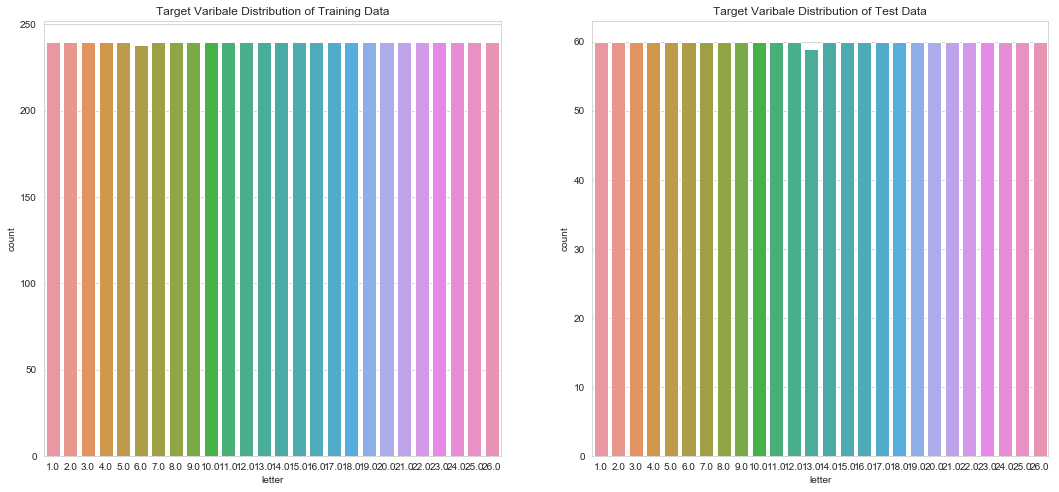

In [14]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
sns.countplot('letter', data=train_df)
plt.title('Target Varibale Distribution of Training Data')

plt.subplot(122)
sns.countplot('letter', data=test_df)
plt.title('Target Varibale Distribution of Test Data')

plt.show()


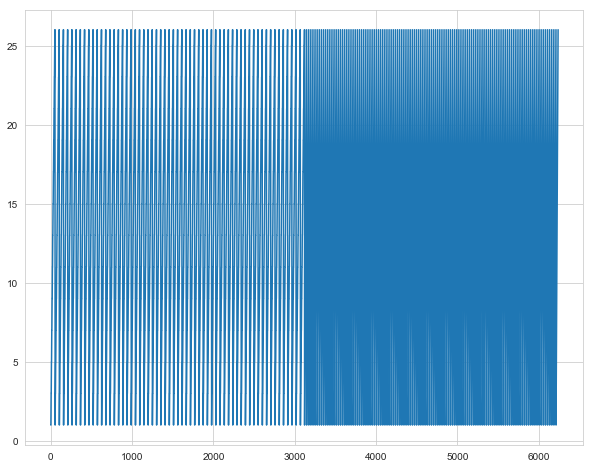

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(train_df.letter)
plt.show()

In [16]:
# generating features and target variable for training and testing
X = train_df.drop(columns='letter', axis=0)
y = train_df.letter

X_test = test_df.drop(columns='letter',axis=0)
y_test = test_df.letter

# 4. Experiments and Results 

## Decision Trees
### Vanilla version of Decision trees Classifier with default parameters

In [18]:
clf = DecisionTreeClassifier()
%time clf.fit(X, y)
print("Accuracy Score for Training Data : ",clf.score(X, y))
print("Accuracy Score for Test Data: ",clf.score(X_test, y_test))

Wall time: 4.54 s
Accuracy Score for Training Data :  1.0
Accuracy Score for Test Data:  0.8011545862732521


### Hyperparameter Tuning

In [19]:
# this is a modified version of plot_learning_curve from scikit learn website. 
# For the main structure all credit goes to the scikit learn authors 

def plot_learning_curve(estimator, X, y, ylim=None, cv=None, title="Learning Curves",
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring=None):
    """
    Generate a simple plot of the test and training learning curve.
    
    """
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


100%|██████████| 3/3 [00:45<00:00, 15.15s/it]


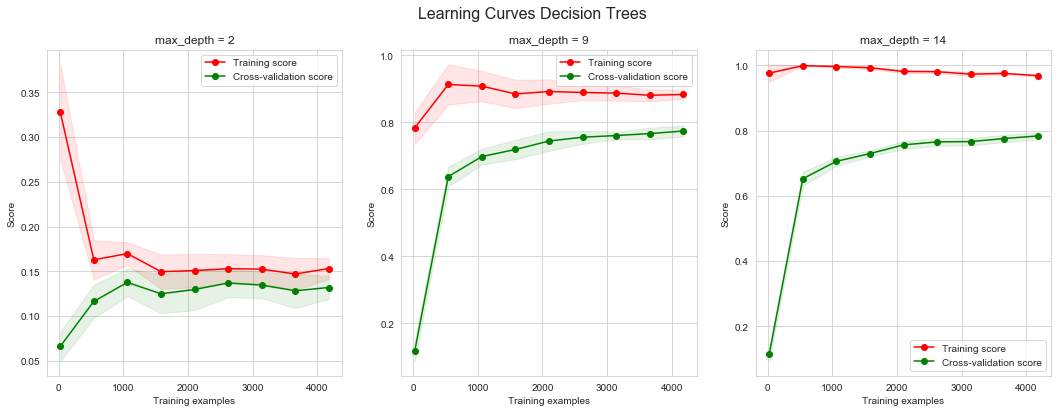

In [20]:
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 33% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Generate the training set sizes
train_sizes = np.rint(np.linspace(25, X.shape[0]*0.67 - 1, 9)).astype(int)

# specify parameters 
depths = [2, 9, 14]

# specify the classifiers with different parameters and plot the learning curves
plt.figure(figsize=(18, 6))
sub_cols = 130

for depth in tqdm(depths):
    sub_cols = sub_cols+1
    plt.subplot(sub_cols)
    estimator = DecisionTreeClassifier(max_depth=depth, min_samples_split=0.001)
    plot_learning_curve(estimator, X, y, cv=cv,train_sizes=train_sizes)
    plt.title('max_depth = {}'.format(estimator.max_depth))

plt.suptitle("Learning Curves Decision Trees", size=16)
plt.show()

### Grid Search Cross Validation to Confirm the Best max_depth

In [26]:
searcher = GridSearchCV(estimator=DecisionTreeClassifier(),
                        param_grid={'min_samples_split':[0.001, 0.01, 0.03, 0.05],
                                    'max_depth':np.arange(3,10)},
                        cv=5, n_jobs=-1, scoring = 'f1_micro')

In [27]:
%time searcher.fit(X, y)
print('Best parameter', searcher.best_params_)
print("Training score after parameter tuning:", searcher.score(X, y))
print('Test score after parameter tuning:',searcher.score(X_test, y_test))

Wall time: 48.8 s
Best parameter {'max_depth': 9, 'min_samples_split': 0.001}
Training score after parameter tuning: 0.8836165437640271
Test score after parameter tuning: 0.7966645285439384


In [28]:
# # warning: this code may take significant amount time to run
# dot_data = StringIO()
# export_graphviz(searcher.best_estimator_, out_file=dot_data, feature_names=X.columns.tolist())
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

## Boosting Trees with Adaboost

In [29]:
clf_boost = AdaBoostClassifier(searcher.best_estimator_)
%time clf_boost.fit(X, y)
print(clf_boost.score(X, y))
print(clf_boost.score(X_test, y_test))

Wall time: 2min 38s
0.9172811798653414
0.8011545862732521


In [30]:
clf_boost

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.001,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

### Tuning Adaboost

Wall time: 18min 29s


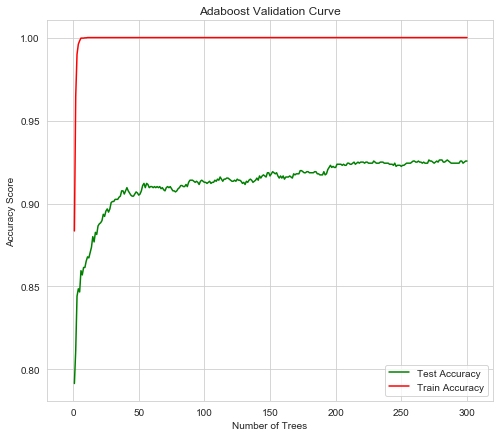

In [31]:
bdt_real = AdaBoostClassifier(searcher.best_estimator_,
                              n_estimators=300,
                              learning_rate=0.1,
                              random_state=42)


%time bdt_real.fit(X, y)

real_test_accuracy = []
train_accuracy = []

for real_test_predict, train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_real.staged_predict(X)):
    real_test_accuracy.append(accuracy_score(real_test_predict, y_test))
    train_accuracy.append(accuracy_score(train_predict, y))

n_trees_real = len(bdt_real)


plt.figure(figsize=(8, 7))
plt.plot(range(1, n_trees_real + 1),
         real_test_accuracy, c='green',
         label='Test Accuracy')
plt.plot(range(1, n_trees_real + 1),
         train_accuracy, c='red',
         label='Train Accuracy')
plt.legend()
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Trees')
plt.xlim((-20, len(bdt_real) + 20))
plt.title('Adaboost Validation Curve')
plt.show()

Wall time: 19min 17s


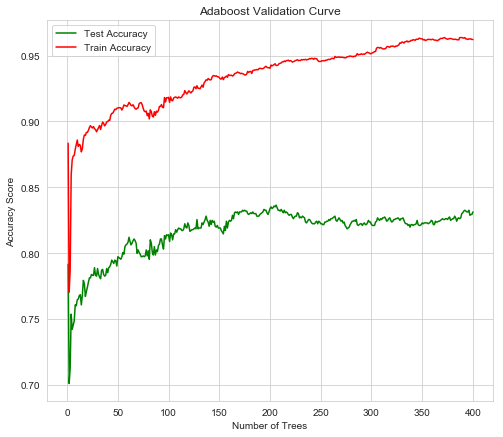

In [32]:
bdt_real = AdaBoostClassifier(searcher.best_estimator_,
                              n_estimators=400,
                              learning_rate=1,
                              random_state=42)


%time bdt_real.fit(X, y)

real_test_accuracy = []
train_accuracy = []

for real_test_predict, train_predict in zip(
        bdt_real.staged_predict(X_test), bdt_real.staged_predict(X)):
    real_test_accuracy.append(accuracy_score(real_test_predict, y_test))
    train_accuracy.append(accuracy_score(train_predict, y))

n_trees_real = len(bdt_real)


plt.figure(figsize=(8, 7))
plt.plot(range(1, n_trees_real + 1),
         real_test_accuracy, c='green',
         label='Test Accuracy')
plt.plot(range(1, n_trees_real + 1),
         train_accuracy, c='red',
         label='Train Accuracy')
plt.legend()
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Trees')
plt.xlim((-20, len(bdt_real) + 20))
plt.title('Adaboost Validation Curve')
plt.show()

In [80]:
clf_boost = AdaBoostClassifier(searcher.best_estimator_, n_estimators=225, learning_rate=0.1)
%time clf_boost.fit(X, y)
print(clf_boost.score(X, y))
print(clf_boost.score(X_test, y_test))

Wall time: 11min 36s
0.999519076627124
0.9416292495189224


## KNN

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.fit_transform(X_test)
X_scaled = X
X_test_scaled = X_test

In [32]:
# simple Knn with default parameters
knn = KNeighborsClassifier()
%time knn.fit(X_scaled,y)
print("Accuracy score on Train data:", knn.score(X_scaled,y))
print('Accuracy score on Test data:', knn.score(X_test_scaled, y_test))


Wall time: 190 ms
Accuracy score on Train data: 0.9329913433792882
Accuracy score on Test data: 0.9127645926876202


### Hyper-parameter (n_neighbors) tuning

In [34]:
knn_searcher = GridSearchCV(knn, param_grid={'n_neighbors':np.arange(3,10)}, cv=3, n_jobs=-1)
%time knn_searcher.fit(X_scaled, y)
print('Best Parameters:', knn_searcher.best_params_)
print("Accuracy score on Train data:", knn_searcher.score(X_scaled, y))
print('Accuracy score on Test data:', knn_searcher.score(X_test_scaled, y_test))

Wall time: 2min 22s
Best Parameters: {'n_neighbors': 5}
Accuracy score on Train data: 0.9329913433792882
Accuracy score on Test data: 0.9127645926876202


Wall time: 3min 22s


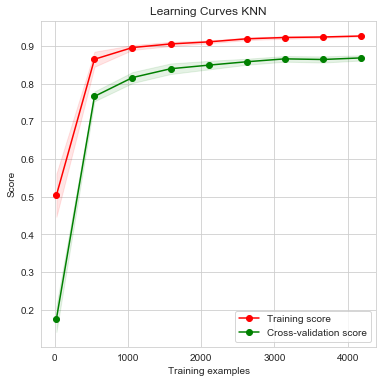

In [36]:
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
estimator = knn_searcher.best_estimator_
plt.figure(figsize=(6, 6))
%time plot_learning_curve(estimator, X_scaled, y, cv=cv,train_sizes=train_sizes)
plt.title('Learning Curves KNN')
plt.show()

In [ ]:
# # Cross validation with 30 iterations to get smoother mean test and train
# # score curves, each time with 33% data randomly selected as a validation set.
# cv = ShuffleSplit(n_splits=30, test_size=0.33, random_state=42)

# # specify the classifiers with different parameters and plot the learning curves
# plt.figure(figsize=(14, 6))
# subs = 120
# for neighbor in [1, 10]:
#     subs = subs + 1
#     plt.subplot(subs)
#     estimator = KNeighborsClassifier(n_neighbors=neighbor)
#     plot_learning_curve(estimator, X_scaled, y, cv=cv,train_sizes=train_sizes[1:])
#     plt.title('Learning Curves KNN({})'.format(neighbor))
# plt.show()

## SVM 

### Linear kernel and Hyper-parameter tuning

In [40]:
svm_searcher = GridSearchCV(SVC(kernel='linear'), param_grid={'gamma':[0.01, 0.1, 1]}, cv=5, n_jobs=4)
%time svm_searcher.fit(X_scaled, y)
print('Best Parameters:', svm_searcher.best_params_)
print("Accuracy score on Train data:", svm_searcher.score(X_scaled, y))
print('Accuracy score on Test data:', svm_searcher.score(X_test_scaled, y_test))

Wall time: 1min 15s
Best Parameters: {'gamma': 0.01}
Accuracy score on Train data: 1.0
Accuracy score on Test data: 0.9602309172546504


Wall time: 1min 30s


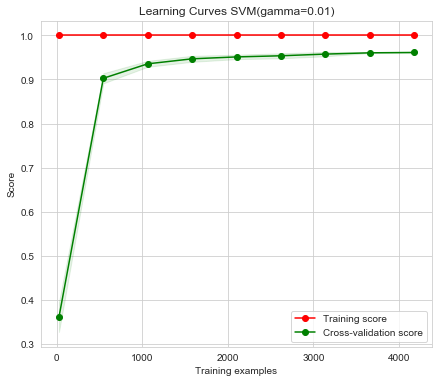

In [46]:
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 33% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
# specify the classifiers with different parameters and plot the learning curves
plt.figure(figsize=(7, 6))
estimator = svm_searcher.best_estimator_
%time plot_learning_curve(estimator, X_scaled, y, cv=cv,train_sizes=train_sizes, n_jobs=3)
plt.title('Learning Curves SVM(gamma={})'.format(svm_searcher.best_params_['gamma']))
plt.show()


### 'rbf' kernel and Hyper-parameter tuning

In [47]:
rbf_searcher = GridSearchCV(SVC(kernel='rbf'), param_grid={'gamma':[ 0.01, 0.1, 1], 'C':[1, 10]}, cv=3, n_jobs=4)
%time rbf_searcher.fit(X_scaled, y)
print('Best Parameters',rbf_searcher.best_params_)
print("Accuracy score on Train data:", rbf_searcher.score(X_scaled, y))
print('Accuracy score on Test data:', rbf_searcher.score(X_test_scaled, y_test))

Wall time: 3min 29s
Best Parameters {'gamma': 0.01, 'C': 10}
Accuracy score on Train data: 1.0
Accuracy score on Test data: 0.9685695958948044


Wall time: 2min 20s


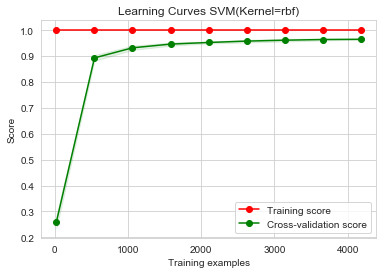

In [48]:
estimator = rbf_searcher.best_estimator_
%time plot_learning_curve(estimator, X_scaled, y, cv=cv,train_sizes=train_sizes, n_jobs=3)
plt.title('Learning Curves SVM(Kernel=rbf)')
plt.show()

## Deep Neural Network

In [34]:
from keras.models import Sequential, save_model
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD, adam
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.fit_transform(X_test)

In [38]:
# early_stopping_monitor = EarlyStopping(patience=2)
input_shape = (X.shape[1],)

# # Create the new model: model_2
# model_1 = Sequential()

# # Add the hidden layers
# model_1.add(Dense(100, activation='relu', input_shape=input_shape))
# model_1.add(Dense(100, activation='relu'))
# model_1.add(Dense(100, activation='relu'))
# model_1.add(Dense(100, activation='relu'))

# # Add the output layer
# model_1.add(Dense(26, activation='softmax'))



### Effect of learning rate in optimization

100%|██████████| 3/3 [00:18<00:00,  6.27s/it]


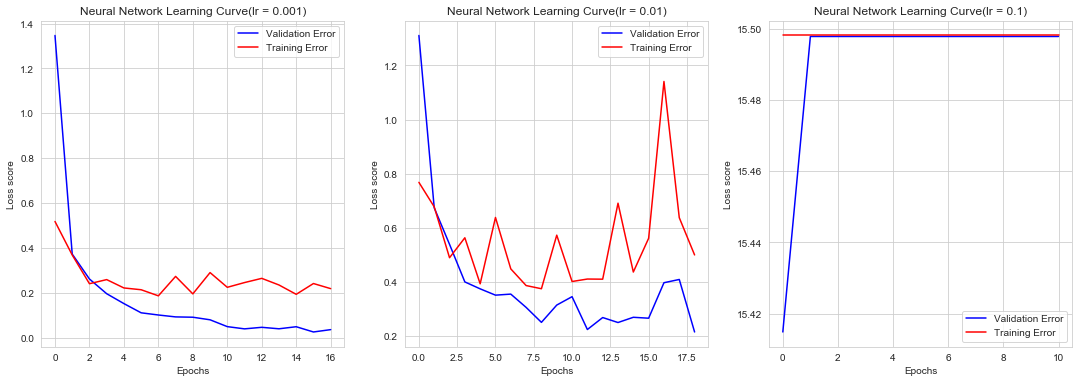

In [39]:
subs = 140
early_stopping_monitor = EarlyStopping(patience=10)

plt.figure(figsize=(25, 6))
for lr in tqdm([0.001, 0.01, 0.1]):
    # Create the new model: model_2
    model_1 = Sequential()

    # Add the hidden layers
    model_1.add(Dense(100, activation='relu', input_shape=input_shape))
    model_1.add(Dense(100, activation='relu'))
    model_1.add(Dense(100, activation='relu'))
    model_1.add(Dense(100, activation='relu'))

    # Add the output layer
    model_1.add(Dense(26, activation='softmax'))
    subs = subs+1
    # Compile model_2
    model_1.compile(optimizer=adam(lr=lr), loss='categorical_crossentropy', metrics=['accuracy'],)
    # Fit model_1
    model_1_training = model_1.fit(X_scaled, to_categorical(y-1), epochs=40, validation_split=0.3, verbose=False, callbacks=[early_stopping_monitor])
    # Create the plot
    plt.subplot(subs)
    plt.plot(model_1_training.history['loss'], color='b', label='Validation Error')
    plt.plot(model_1_training.history['val_loss'], color='r',label='Training Error')
    plt.xlabel('Epochs')
    plt.ylabel('Loss score')
    plt.legend(loc='best')
    plt.title('Neural Network Learning Curve(lr = {})'.format(lr))
plt.show()


### Effect of number of layers

In [43]:
early_stopping_monitor = EarlyStopping(patience=10)
np.random.seed(0)
input_shape = (X.shape[1],)
subs = 140
losses = []
accs = []
train_accs = []
# plt.figure(figsize=(25, 6))
for layer in tqdm(range(4)):
  model = Sequential()
  # add first hidden layers
  model.add(Dense(200, activation='relu', input_shape=input_shape))  
  for l in range(layer):
    model.add(Dense(200, activation='relu'))
  model.add(Dense(26, activation='softmax'))
  subs = subs+1
  # Compile model
  model.compile(optimizer=adam(lr =0.01), loss='categorical_crossentropy', metrics=['accuracy'])

  # Fit model_1
  model_training = model.fit(X_scaled, to_categorical(y-1), epochs=40, validation_split=0.3, verbose=False, callbacks=[early_stopping_monitor])
  loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test-1), verbose=False)
  losses.append(loss)
  accs.append(acc)
  train_accs.append(max(model.history.history['val_acc']))
print("Test Accuracy scores:", accs)
print("Loss Scores:", losses)
print("Train Accuracy Scores:", train_accs)

100%|██████████| 4/4 [01:53<00:00, 28.29s/it]


Test Accuracy scores: [0.9211032709072154, 0.9223861445441622, 0.923669018181109, 0.8434894161777974]
Loss Scores: [0.3478616286467013, 0.39110983322261617, 0.3436976464141478, 0.5942499513730092]
Train Accuracy Scores: [0.9401709401709402, 0.9348290598290598, 0.936965811965812, 0.9006410256410257]


In [69]:

# Create the new model: model_2
model_2 = Sequential()

# Add the hidden layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))
model_2.add(Dense(100, activation='relu'))
# model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(26, activation='softmax'))

model_2.compile(optimizer=adam(lr =0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model_2
model_2_training = model_2.fit(X_scaled, to_categorical(y-1),
                               epochs=40, batch_size=60,
                               validation_split=0.3,
                               verbose=False,
                               callbacks=[early_stopping_monitor])

model_2.evaluate(X_test_scaled, to_categorical(y_test-1), verbose=False)

[0.3487780570429514, 0.9281590759104227]

In [70]:
model_2_training.params

{'batch_size': 60,
 'do_validation': True,
 'epochs': 40,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 4366,
 'steps': None,
 'verbose': False}

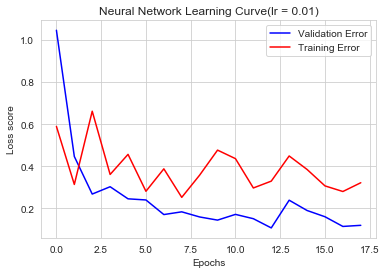

In [71]:
plt.plot(model_2_training.history['loss'], color='b', label='Validation Error')
plt.plot(model_2_training.history['val_loss'], color='r',label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Loss score')
plt.legend(loc='best')
plt.title('Neural Network Learning Curve(lr = 0.01)')
plt.show()